<a href="https://colab.research.google.com/github/SodaCocoa/Sesac_AI_1/blob/main/%EA%B0%95%EC%95%84%EC%A7%80%EC%A2%85_%EB%B6%84%EB%A5%98_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
!tar -xvf /content/drive/MyDrive/deep_project/images.tar -C /content/drive/MyDrive/deep_project


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_744.jpg
Images/n02109047-Great_

2. 데이터셋 준비

In [ ]:
import os

# 기본 경로 설정
base_dir = '/content/drive/MyDrive/deep_project/dataset'

# 학습, 검증, 테스트 세트를 위한 디렉토리 생성
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# 디렉토리 생성 함수
def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

# 학습, 검증, 테스트 디렉토리 생성
create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

PATH = '/content/drive/MyDrive/deep_project/Images'

# train_dir = os.path.join(PATH, 'train')    # 이 자료는 train과 val을 별도로 제공하지 않음
# validation_dir = os.path.join(PATH, 'validation')  # 이 자료는 train과 val을 별도로 제공하지 않음

3. 데이터 전처리 및 증강

In [ ]:
!ls "/content/drive/MyDrive/deep_project/Images"


n02085620-Chihuahua			  n02100583-vizsla
n02085782-Japanese_spaniel		  n02100735-English_setter
n02085936-Maltese_dog			  n02100877-Irish_setter
n02086079-Pekinese			  n02101006-Gordon_setter
n02086240-Shih-Tzu			  n02101388-Brittany_spaniel
n02086646-Blenheim_spaniel		  n02101556-clumber
n02086910-papillon			  n02102040-English_springer
n02087046-toy_terrier			  n02102177-Welsh_springer_spaniel
n02087394-Rhodesian_ridgeback		  n02102318-cocker_spaniel
n02088094-Afghan_hound			  n02102480-Sussex_spaniel
n02088238-basset			  n02102973-Irish_water_spaniel
n02088364-beagle			  n02104029-kuvasz
n02088466-bloodhound			  n02104365-schipperke
n02088632-bluetick			  n02105056-groenendael
n02089078-black-and-tan_coonhound	  n02105162-malinois
n02089867-Walker_hound			  n02105251-briard
n02089973-English_foxhound		  n02105412-kelpie
n02090379-redbone			  n02105505-komondor
n02090622-borzoi			  n02105641-Old_English_sheepdog
n02090721-Irish_wolfhound		  n02105855-Shetland_sheepdog
n02091032-Itali

In [ ]:
# batchsize, image size 지정
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                            validation_split=0.2,  # 전체데이터의 20%를 val로
                                                            subset="training",     # 80%의 이름은 training로
                                                            seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

validation_dataset = tf.keras.utils.image_dataset_from_directory(PATH,
                                                                validation_split=0.2,  # 전체데이터의 20%를 val로
                                                                subset="validation",     # 80%의 이름은 validation 로
                                                                seed=123,              # 같은 자료로 나눌수 있게 seed값 고정
                                                                shuffle=True,
                                                                batch_size=BATCH_SIZE,
                                                                image_size=IMG_SIZE)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.
Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [ ]:
################################
### class_names는 이 코드에서는 사용할수 있지만 혹시 모델을 저장하고 새 파일에서 사용할때는
### 사용할수 없는 변수명임으로 필요하다면 class_name만 별도의 txt나 json파일로 저장해야함.
### class_name가 많다면
#####################################
class_names = train_dataset.class_names
class_names

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [ ]:
#########################################################
### 추가코드  (take에 대한 이해를 돕기위해)
### Found 1530 files belonging to 3 classes.
###  Using 1224 files for training. ====> 임으로
###  1224개 의 train 자료를 32개씩 배치했음으로   38.25 임으로 총 39개의 세트가 생김
###                          32개*38개take=1216 개 데이터셋  + 마지막 39번째 take에는 8개의 데이터셋만 있음
### take(번호) 는 그 번호까지 값을 출력하는 기능이며 tensor은 텐서라는 특수한 타입으로 작업되어 있음. 파이토치 할때 다시 강의함.
#######################################################

for bun, (images, labels) in enumerate(train_dataset.take(48)):
  print(bun+1,'take:   ', labels)

1 take:    tf.Tensor(
[ 94  90  99  93  61  29  38 101  13 109  14  30  59   1  32  12  97  39
  54  12   4  92  52  70  42  31  28 119  47  48 116  99], shape=(32,), dtype=int32)
2 take:    tf.Tensor(
[ 49 107 101  81  16  72  84  54   6  49  12  16 115 113  35  99 117  96
  82  44  40  75   6 100 114  19  78  30  42  98  19  56], shape=(32,), dtype=int32)
3 take:    tf.Tensor(
[ 49  39  92  30  59 107  77  86  49 111 109  58  53 114  29  23  72  36
   9  83 100  49 102  88  78  49  49 109  81 104  37  32], shape=(32,), dtype=int32)
4 take:    tf.Tensor(
[ 44  36 105  86  58  35  72  38  36  80   5  66  12  91  32 115  37  29
  39 102  84  60  84  81  47  38  76  88  89 115  47  39], shape=(32,), dtype=int32)
5 take:    tf.Tensor(
[ 45  46 117  22 113  99  80  77  79 100  57  24  21   4  26   9  83 119
  96  16  64   8  56  62 107 108 118  96  40  35 102  73], shape=(32,), dtype=int32)
6 take:    tf.Tensor(
[101 109  76  43  37  30  19 101  39 114  62  27  81  11  92  71  13  77
  64 

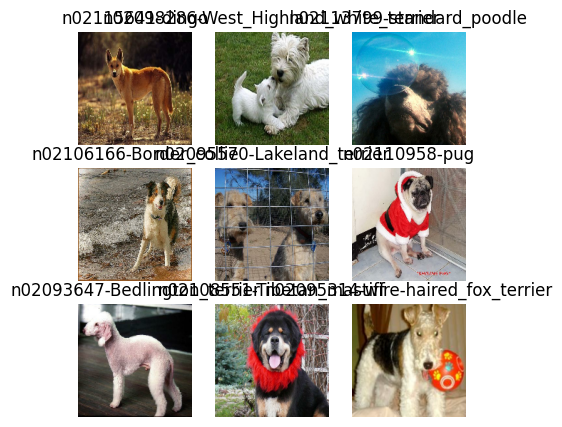

In [ ]:
plt.figure(figsize=(5, 5))
class_names = train_dataset.class_names
class_names
for images, labels in train_dataset.take(1):
  for i in range(9):  # 9개의 이미지 출력
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))  # 이미지 표현을 위해 numpy 배열 dtype을 uint8로 지정
    plt.title(class_names[labels[i]])  # images에 해당하는 레이블 출력
    plt.axis("off")

In [ ]:
##########################
## test dataset이 없었기 때문에 validation dataset에서 일정부분 가져와서 사용함
### 아래코드는 복사하여서
### gpt에게 '다음코드 해석해줘'
### 붙여넣기
#########################
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)   # // 는 몫함수로 15//5 는 3임
validation_dataset = validation_dataset.skip(val_batches // 5)


In [ ]:
#####################
## 속도높이기
## gpt에게 코드해석 및  캐시메모리, 버퍼 개념 알기
###########################
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

5. 모델 컴파일

In [ ]:
###############################################################
## 데이터 증강, 데이터증강은 이 외에도 다양한 기법을 적용할수 있으며
## 데이터 과적합시 증강에 대한 이슈가 커짐
## 지금은 'https://www.cubox.ai/board/blog/board_view.php?&page=1&num=625' 이 사이트만 대략 살펴보며
## 추후 구글검색 '데이터 증강 최신 논문' 으로 계속 살펴봐야함.
################################################################
# 데이터 증강 기법으로 좌우 반전, 회전, 명암 조절을 적용
##
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomContrast(0.3)
])

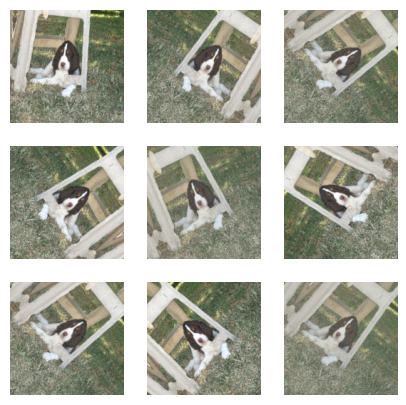

In [ ]:
# augmentation 기법 적용 결과 확인
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(5,5))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    # tf.expand_dims를 통해 기존 이미지의 차원을 확장함 (first_image : 차원이 늘려질 배열, 0(axis) : 몇 번째 차원의 크기를 늘릴 것인지)
    # 차원 확장 후 이미지 증강 기법 적용
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [ ]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model_2 = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')

In [ ]:
base_model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 160, 160, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 166, 166, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 80, 80, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 80, 80, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
#################################
### 추가코드 (코렙에서)
### gpt에게 '코렙에서 Graphviz 로 모델 시각화, 텐서플로우로'
### 모델을 그래프로 표현하기 위하여 설치파일
################################
!apt-get install -y graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
import tensorflow as tf

# 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 모델 요약 출력
model.summary()
# 모델 시각화
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
##########################
### 샘플로 3개만
get_layer_name = [layer.name for layer in base_model_2.layers]
get_output = [layer.output for layer in base_model_2.layers]
len(get_output), get_output[:3]

In [ ]:
##############
## 각 레이어 번호및 이름출력(샘플로 3개만)
######################
for i, j in enumerate(base_model_2.layers[:3]):
    print(i, j.name)

In [ ]:
###############################
# 원본이미지보기
##########################
from PIL import Image
from glob import glob
plt.figure(figsize=(2,2))

# 파일명이 복잡하여 glog명령으로 파일을 가져오고자 함
# 잘 인식안될거 같은 이미지로 해보는것도 좋음

from PIL import Image
file=sorted(glob('/content/drive/MyDrive/deep_project/Images/n02088364-beagle/*.jpg'))[1]
img=Image.open(file).resize((160,160))
plt.imshow(img)
plt.show()

img=np.array(img)
newimg=np.reshape(img, (1,160,160,3))


In [ ]:
################################
#### 위의원본파일이 전이학습 모델의 피처맵에서
###  어떻게 반응하는지를 보고자함
###  0값은 검정색임으로 반응하지 않으면 검정색, 반응하면 흰색으로 보임
#####################################
# 특정 범위 레이어들의 feature map 시각화
def check_feature(num_layer, input_img):
  ins = base_model_2.input
  outs = base_model_2.layers[num_layer].output
  feature_map = tf.keras.models.Model(ins, outs)
  feature = feature_map.predict(input_img)
  plt.figure(figsize=(10,4))

  for i in range(10):
    plt.subplot(1,10, i+1)
    plt.imshow(feature[0,:,:,i], cmap="gray")
  plt.show()

In [ ]:
layCnt=len(get_output)
cntLayer=len(get_output)

->10번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 561ms/step


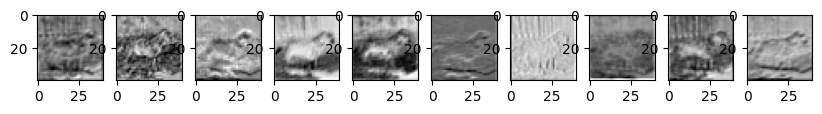

->11번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 0s 238ms/step


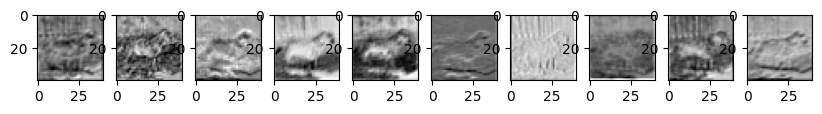

In [ ]:
### low-level feature feature Map보기
for i in range(10,12):  ## 90이상 레이어보면 이미지가 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

->170번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 3s 3s/step


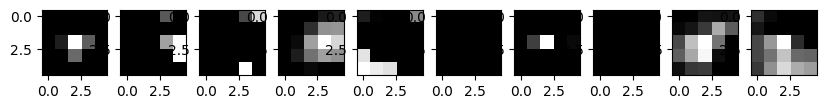

->171번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 3s 3s/step


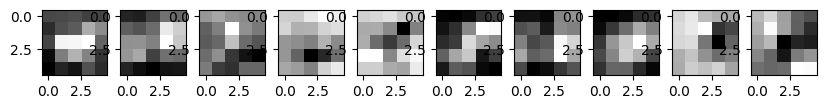

->172번째 layer를 통과하면 아래와같이 결과물 output됨


1/1 [==============================] - 3s 3s/step


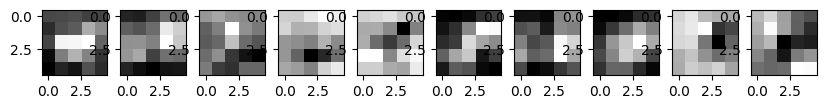

->173번째 layer를 통과하면 아래와같이 결과물 output됨


1/1 [==============================] - 2s 2s/step


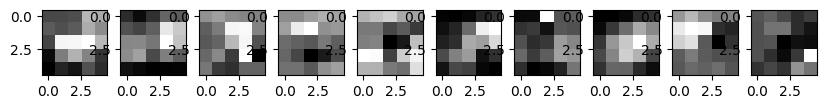

->174번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 4s 4s/step


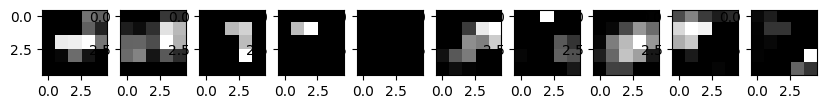

In [ ]:
###  high level feature   feature Map보기
for i in range(170,175):  ## 170,175 레이어보면 이미지가 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

->70번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 610ms/step


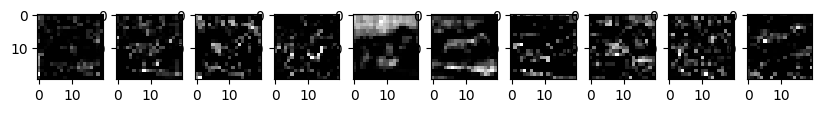

->71번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 699ms/step


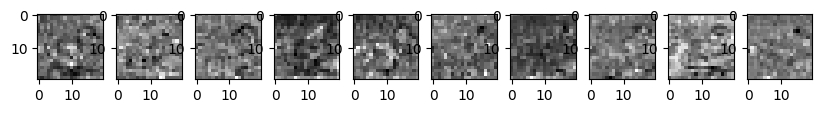

->72번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 624ms/step


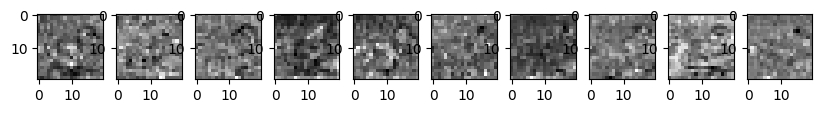

->73번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 994ms/step


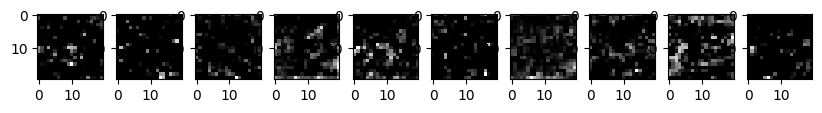

->74번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 540ms/step


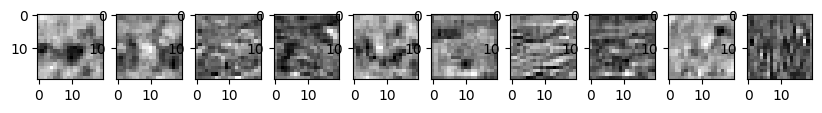

->75번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 501ms/step


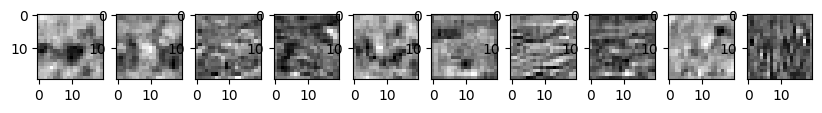

->76번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 502ms/step


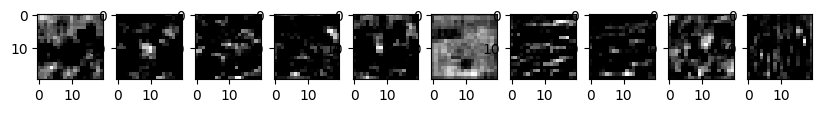

->77번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 780ms/step


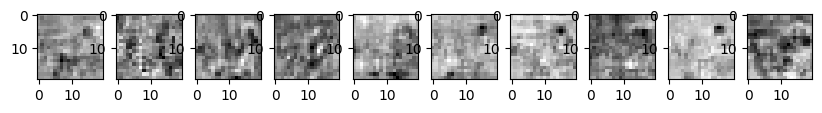

->78번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 2s 2s/step


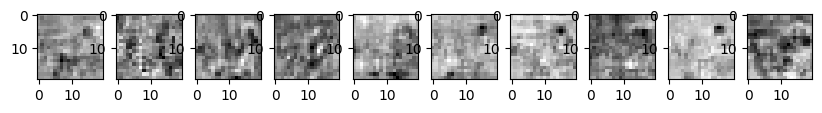

->79번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 540ms/step


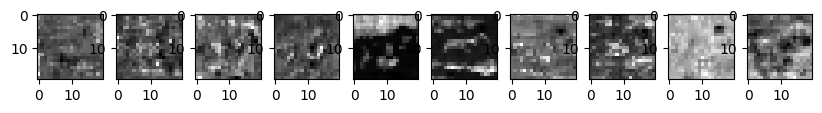

->80번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 508ms/step


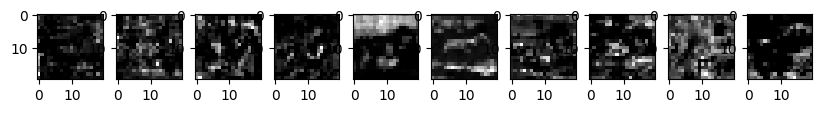

->81번째 layer를 통과하면 아래와같이 결과물 output됨
1/1 [==============================] - 1s 534ms/step


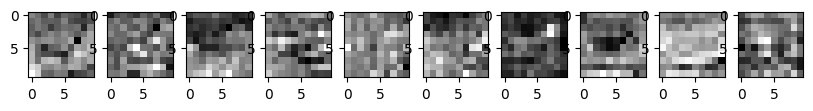

In [ ]:
###  반응이 어느정도 있을것으로 예상되는 2/3 지점정도를 예상해봄
for i in range(70,82):  ## 80번째부터 보이지 않음
  print('->{0}번째 layer를 통과하면 아래와같이 결과물 output됨'.format(i))
  check_feature(i, newimg)

In [ ]:
#############################
### 위에서 80번째 레이어까지를 사용하기로 결정하였지만 일단은 기본 전이학습 모델로 작업하고자함.
### 이작업에서 차트까지 그리고난뒤에 파인튜닝은 그다음에 진행하고자 함.
### 전체 모델을 구성하고자 함
################################


IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=IMG_SHAPE,
                                                    include_top=False,
                                                    weights='imagenet')
###############

base_model.trainable = False
preprocess_input = tf.keras.applications.resnet50.preprocess_input     # 255로 나누는 작업임
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(3, activation='softmax')    ### 3은 현재 len(class_names)로 해도 됨


####################
# 모델 정의
##################

inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)  # 데이터 증강
x = preprocess_input(x) # 전처리
x = base_model_2(x, training=False) # MobileNet V2d의 basemodel


# x = tf.keras.layers.Dropout(0.2)(x)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)  # output layer
model = tf.keras.Model(inputs, outputs)


base_learning_rate = 0.0001  # 학습률 지정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
initial_epochs = 5            # 시간문제상 3번만 돌린결과이나 여러분은 10번이상 돌리세요
# 12

# 러닝레이트의 비율을 유동적으로 변화할 수 있도록 설정함
def scheduler(epoch, learning_rate):
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.1)
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)


#####################
## 현재모델은 마지막 값만 기억함으로  각 에포크마다 모델을 save할지
## 가장 좋은 모델만 저장할지
## 그리고 모델의 값이 일정한 횟수만큼 나아지지 않으면 모델을 중단할지를 더 결정해야함
############################
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset,
                    callbacks=[lr_scheduler_cb])

Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-47-b14160a08263>", line 18, in <cell line: 18>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

Received a label value of 114 which is outside the valid range of [0, 3).  Label values: 57 113 72 100 50 114 33 40 71 72 32 92 62 8 71 30 102 47 99 103 84 30 105 22 38 35 12 57 25 35 16 16
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_52176]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

NameError: name 'history' is not defined

In [ ]:
#######################
##  시각화를 통해서 80번쨰 레이어의 값만 사용하기로 결정
######################
base_model.trainable = True # 고정 해제

# 동결 층 지정
fine_tune_at = 80


# 80이상의 층은 동결시키고 훈련을 다시 시작함
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

# 사전 훈련된 가중치를 다시 조정하고 과대적합 방지를 위해 더 낮은 학습률을 사용함
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

fine_tune_epochs = 3     # 시간문제상 3번만 돌린결과이나 여러분은 상황에 따라 10번이상 돌리세요, 현재모델은 마지막만 기억합니다.
total_epochs =  initial_epochs + fine_tune_epochs

#####################
## 현재모델은 마지막 값만 기억함으로  각 에포크마다 모델을 save할지
## 가장 좋은 모델만 저장할지
## 그리고 모델의 값이 일정한 횟수만큼 나아지지 않으면 모델을 중단할지를 더 결정해야함
############################


history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)



In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
# plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
# plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

In [ ]:


###################################
### 샘플로 첫사진만 봄
### iterator().next() 는 첫번째 데이터셋이라는 뜻
### 샘플로 볼때 사용하기에좋은 코드임
### 한세트가 32개로 구성되어 있음
### ctrl+Enter 실행할때마다 다른 결과가 나옴. (validation_dataset 자료를 계속 랜덤하게 부름)
#############################

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()

########### 32개의 사진중 [0]첫번째 자료만 보기
plt.imshow(image_batch[0].astype('uint8'))   #첫번째사진 만 봄
plt.title(class_names[label_batch[0]])


predictions = model.predict_on_batch(image_batch)
predictions=tf.nn.softmax(predictions[0])

print(predictions)
predBun=np.argmax(predictions)


print('\n▶가장큰번호는->{0}'.format(predBun))
print('▶인공지능이 예측한 값은->{0}'.format(class_names[predBun]))
print('▶인공지능이 예측한 확률은 ->{0}'.format(predictions[predBun]))


In [ ]:
############################
### 모델에 테스트 자료 적용
############################

testPredict=model.predict(validation_dataset)

In [ ]:
##########################
### iterator().next() 는 첫번째 데이터셋이라는 뜻
### 샘플로 볼때 사용하기에좋은 코드임
### 한세트가 32개로 구성되어 있음
### ctrl+Enter 실행할때마다 다른 결과가 나옴. (validation_dataset 자료를 계속 랜덤하게 부름)
#############################

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch) #32개의 세트자료임
predictions=tf.nn.softmax(predictions)
predBun=np.argmax(predictions,1)

print('▶--실제값')
print(label_batch)

print('\n-- 예측값')
print(predBun)

In [ ]:
################################
### 예상율이 0.5 보다 작으면 빨간색으로  (임계값은 사용자가 알아서 정함)
## 타이틀 출력
################################

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))
image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict(image_batch)
predictions=tf.nn.softmax(predictions)
predBun=np.argmax(predictions,1)

i=1
for x,y,pred in zip(image_batch, label_batch,predBun):
    ax=plt.subplot(8, 5, i + 1)
    plt.imshow(x.astype('uint8'))
    predRatio=predictions[i-1,pred]

    color = "green" if predRatio>0.5 else "red"
    plt.title(f'{class_names[pred]} \n {predRatio}', color=color)
    i+=1
    plt.axis("off")

In [ ]:
model.save('fashion.h5')   # 드라이브 마운트 안한상태라면 임시폴더에 있음으로 다운로드 받아야함

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

image_batch, label_batch = validation_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)
predBun=np.argmax(predictions, axis=-1)

conMatrix = confusion_matrix(predBun, label_batch.astype(float))
conMatrix

In [ ]:
cnt=len(conMatrix)
pd.DataFrame(conMatrix,
             index=['true_%d' % i for i in range(cnt)],
             columns=['pred_%d' % i for i in range(cnt)] )

In [ ]:
import seaborn as sns
plt.figure(figsize=(3,3))
sns.heatmap(conMatrix,annot=True, fmt='d',cmap='Blues')
plt.xlabel('predicated label')
plt.ylabel('true label')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(label_batch, predBun, target_names=class_names))